<a href="https://colab.research.google.com/github/NavSanya/IrisClassification-DT-GNU/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree


In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','Species']
iris = pd.read_csv(url, names = col_name)
print(iris)

     sepal-length  sepal-width  petal-length  petal-width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
print(iris.shape)

(150, 5)


In [4]:
print(iris.describe())


       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


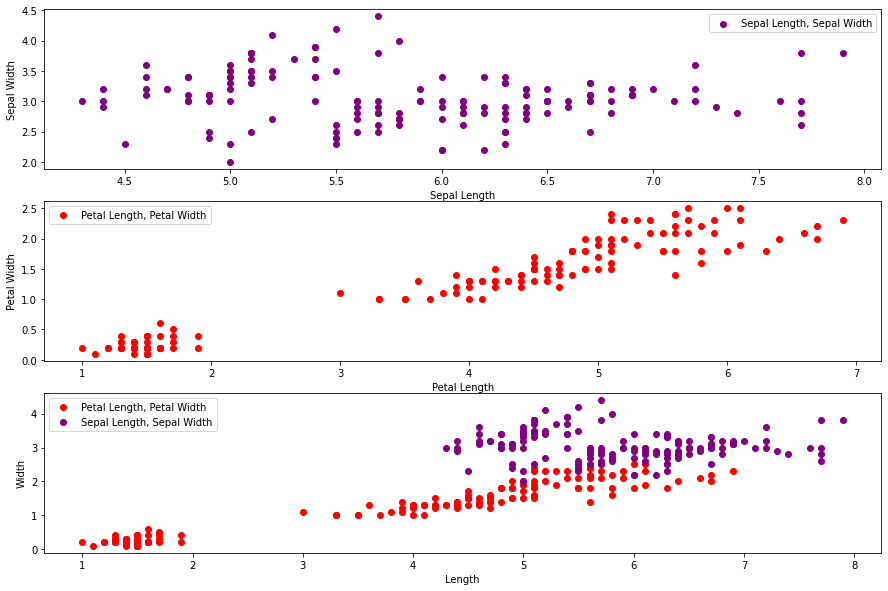

In [5]:

IrisDataNumpyArray=np.array(iris)

plt.subplots(3, 1, figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.scatter(iris['sepal-length'], iris['sepal-width'], c='purple',
            label='Sepal Length, Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(iris['petal-length'], iris['petal-width'], c='red',
            label='Petal Length, Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(iris['petal-length'], iris['petal-width'], c='red',
            label='Petal Length, Petal Width')
plt.scatter(iris['sepal-length'], iris['sepal-width'], c='purple',
            label='Sepal Length, Sepal Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.savefig('Plotting.png')

In [6]:
n = len(iris[iris['Species'] == 'Iris-versicolor'])
print("Number of Versicolor in Dataset:",n)

n1 = len(iris[iris['Species'] == 'Iris-virginica'])
print("Number of Virginica in Dataset:",n1)

n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("Number of Setosa in Dataset:",n2)

Number of Versicolor in Dataset: 50
Number of Virginica in Dataset: 50
Number of Setosa in Dataset: 50


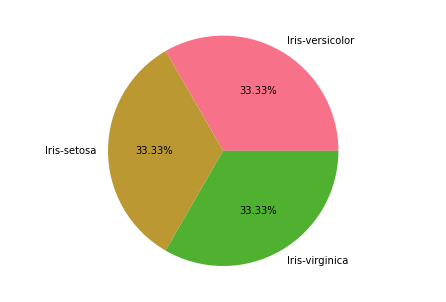

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

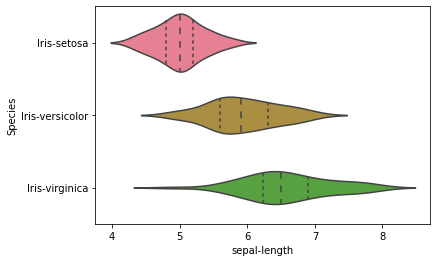

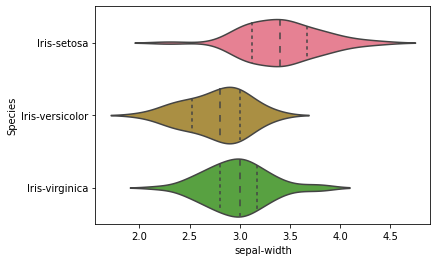

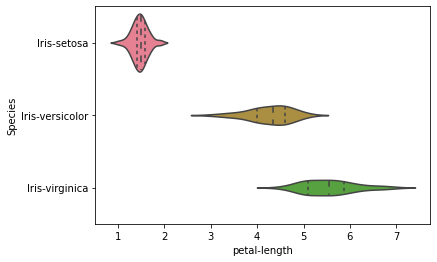

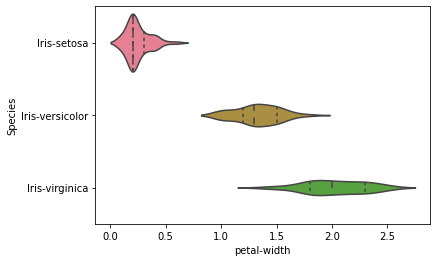

In [8]:
sns.violinplot(y='Species', x='sepal-length', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='sepal-width', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='petal-length', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='petal-width', data=iris, inner='quartile')
plt.show()

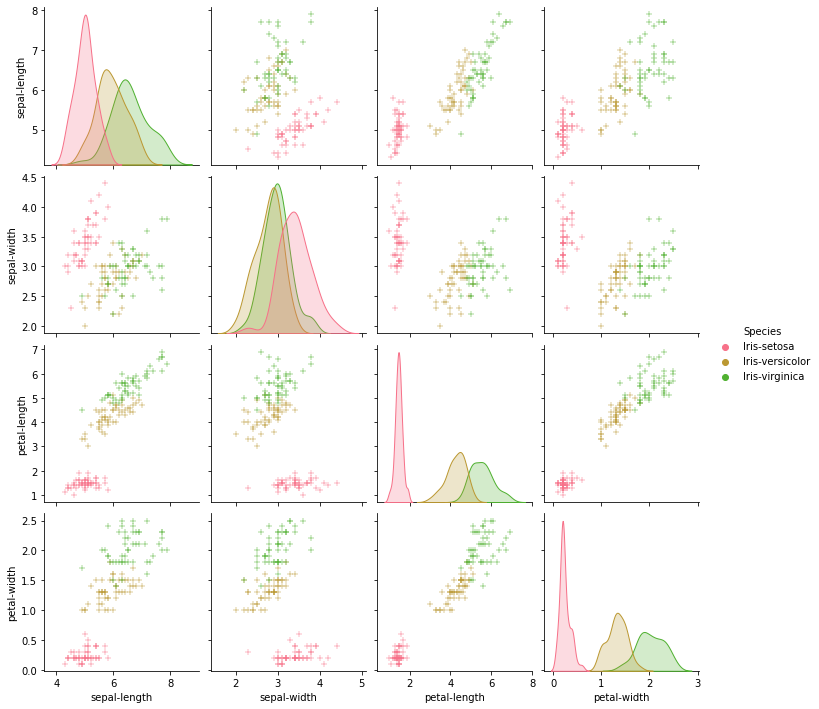

In [9]:
sns.pairplot(iris, hue='Species', markers='+')
plt.show()

sepal-length       AxesSubplot(0.125,0.536818;0.133621x0.343182)
sepal-width     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
petal-length     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
petal-width     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

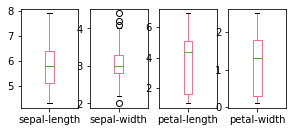

In [10]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

In [11]:
def train_and_test_split():
  train, test = train_test_split(iris, test_size = 0.25)
  train_X = train[['sepal-length', 'sepal-width', 'petal-length',
                  'petal-width']]
  train_y = train.Species

  test_X = test[['sepal-length', 'sepal-width', 'petal-length',
                  'petal-width']]
  test_y = test.Species
  return train_X, train_y, test_X, test_y

In [15]:
#Using GaussianNB
def NB(train_X, train_y, test_X, test_y):
  model1 = GaussianNB()
  model1.fit(train_X,train_y)
  y_pred1 = model1.predict(test_X)

  return accuracy_score(test_y,y_pred1)

In [16]:
#Using Decision Tree Classifier
def DTC(train_X, train_y, test_X, test_y):
  model2 = DecisionTreeClassifier(criterion='entropy',random_state=7)
  model2.fit(train_X,train_y)
  y_pred2 = model2.predict(test_X)

  fig, ax = plt.subplots(figsize=(6, 6))
  tree.plot_tree(model2,ax=ax,feature_names=['sepal-length','sepal-width','petal-length','petal-width'])
  plt.show()

  return accuracy_score(test_y,y_pred2)

In [17]:
def trial_runs(num_of_trainings):
  sumNB=0
  sumDTC=0

  #sum up accuracy scores
  for i in range (num_of_trainings):
    train_X, train_y, test_X, test_y = train_and_test_split()
    sumNB += NB(train_X, train_y, test_X, test_y)
    sumDTC +=DTC(train_X, train_y, test_X, test_y)

  #average out accuracies
  print("Average Accuracy for Gaussian Naive Bayes: ", (sumNB/num_of_trainings))
  print("Average Accuracy for Desision Tree Classifier: ", (sumDTC/num_of_trainings))

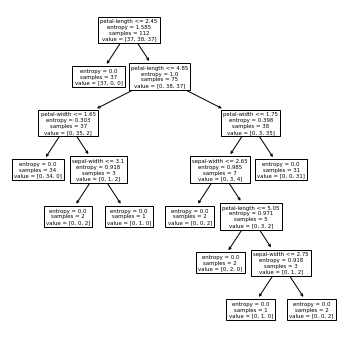

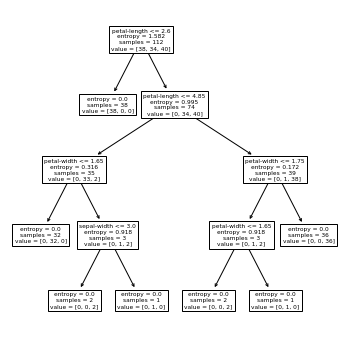

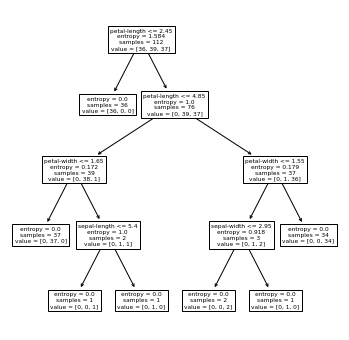

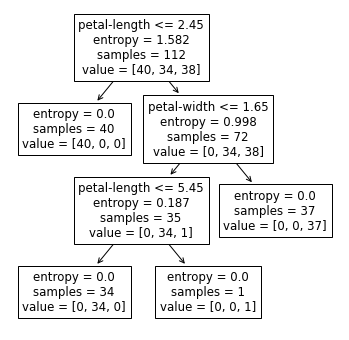

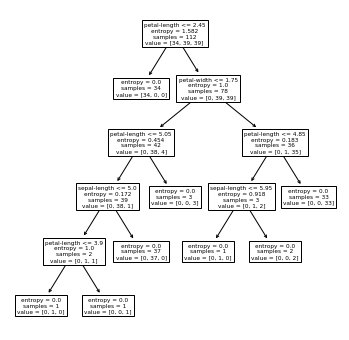

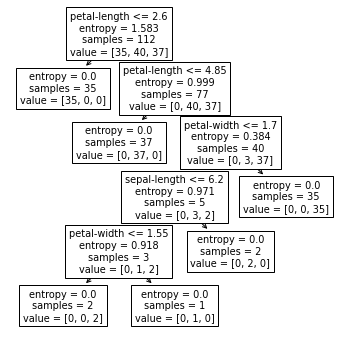

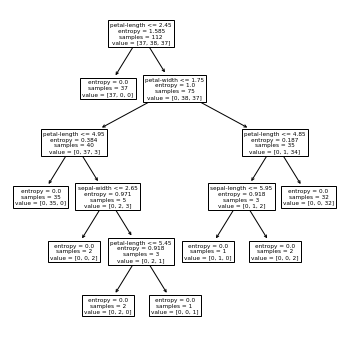

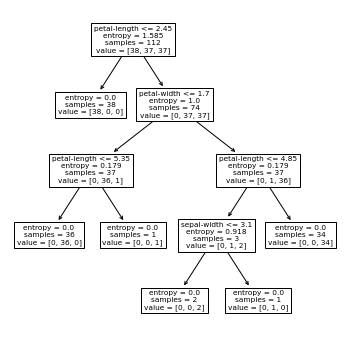

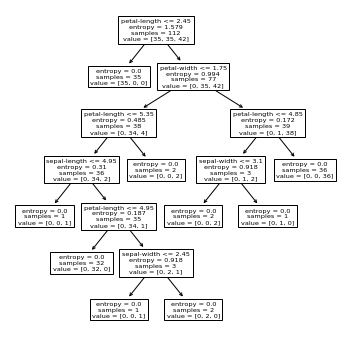

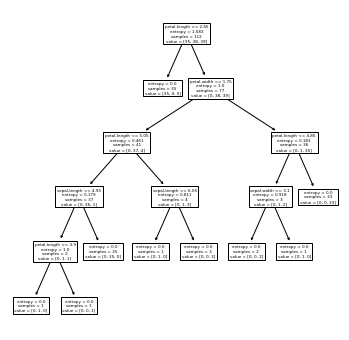

Average Accuracy for Gaussian Naive Bayes:  0.9342105263157896
Average Accuracy for Desision Tree Classifier:  0.9236842105263158


In [18]:
trial_runs(10)